Итоговый проект оп курсу "PYTHON для анализа данных"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from   sklearn.linear_model import LinearRegression
from   sklearn.model_selection import train_test_split
#import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

**1. Загрузите файл HR.csv в pandas dataframe**

**Решение**

In [2]:
hr_df = pd.read_csv('HR.csv')
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [102]:
hr_df.shape

(14999, 10)

**2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)**

**Решение:**
Основные статистики рассчитаем с помощью метода describe() библиотеки pandas, моду и медиану рассчитаем отдельно соответствующими методами

In [3]:
hr_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
hr_df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
hr_df.median()

<ipython-input-5-0ec9943ed004>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hr_df.median()


satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

**3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные**

**Решение**
Для расчета корреляций между количественными переменными сформируем новый датафрейм, в котором удалим все категориальные столбцы.
Затем построим визуализацию корреляционной матрицы при помощи тепловой карты и проанализируем полученные результаты.

In [19]:
hr_df_corr = hr_df.drop(columns = ['time_spend_company',	'Work_accident','left',	'promotion_last_5years',	'department',	'salary'])
hr_df_corr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048
last_evaluation,0.105021,1.000000,0.349333,0.339742
number_project,-0.142970,0.349333,1.000000,0.417211
average_montly_hours,-0.020048,0.339742,0.417211,1.000000


<Axes: >

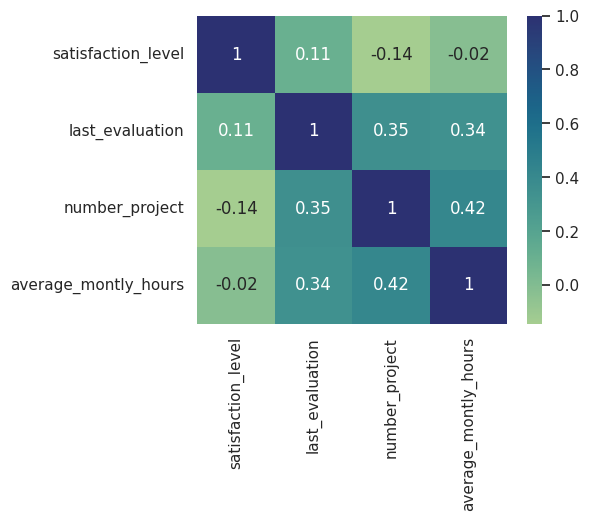

In [23]:
sns.set(rc={'figure.figsize':(5, 4)})
sns.heatmap(hr_df_corr.corr(), annot=True, cmap='crest')

**Задание 3. ВЫВОД**
Из проведенных расчетов мы видим, что наиболее сильная, и при этом прямая корреляция (так как знак положительный), наблюдается между значениями столбцов 'number_project' и 	'average_montly_hours', но при этом по своему абсолютному значению она относится к средней. Менее всего взаимозависимы значения 'столбцов satisfaction_level' и 'average_montly_hours'. Корреляция здесь имеет отрицательный знак и близкое к 0 значение, что свидетельствует о слабой обратной зависимости. Все это наглядно продемонстрировано на тепловой карте.

**4. Рассчитайте сколько сотрудников работает в каждом
департаменте**

**Решение**


In [74]:
hr_df_dep = hr_df.groupby(hr_df['department'])['department'].count()
hr_df_dep.head(10)

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

**5. Показать распределение сотрудников по зарплатам.**

In [75]:
hr_df_salary = hr_df.groupby(hr_df['salary'])['salary'].count()
hr_df_salary.head()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

<Axes: ylabel='salary'>

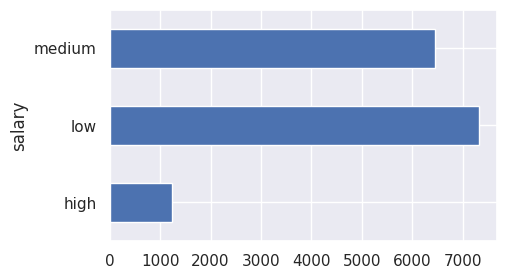

In [89]:
hr_df.groupby('salary')['salary'].count().plot(kind="barh",figsize=(5,3))

**6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности**

In [79]:
hr_df_pers = hr_df.groupby([hr_df['department'],hr_df['salary']])[['salary']].count()
hr_df_pers

salary
department  salary        
IT          high        83
            low        609
            medium     535
RandD       high        51
            low        364
            medium     372
accounting  high        74
            low        358
            medium     335
hr          high        45
            low        335
            medium     359
management  high       225
            low        180
            medium     225
marketing   high        80
            low        402
            medium     376
product_mng high        68
            low        451
            medium     383
sales       high       269
            low       2099
            medium    1772
support     high       141
            low       1146
            medium     942
technical   high       201
            low       1372
            medium    1147

<Axes: ylabel='department,salary'>

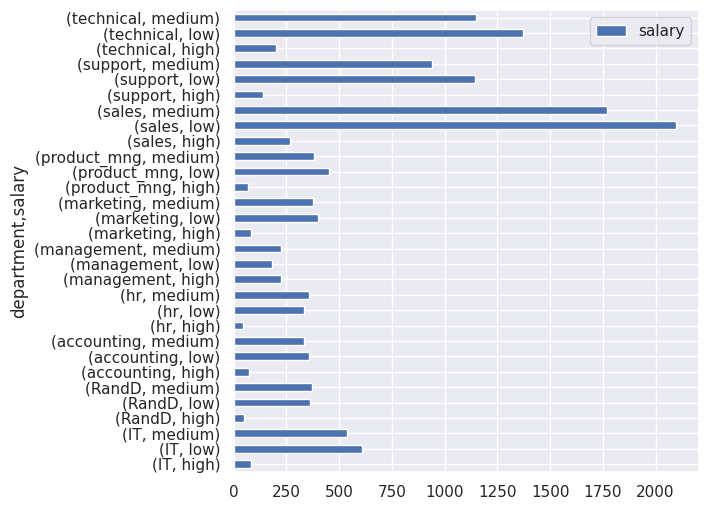

In [85]:
hr_df_pers.plot(kind="barh",figsize=(6,6))

**7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом**

**Решение**
1. Сформулируем нулевую и альтернативную гипотезы:

**Н0**: Время, проведенное на работе сотрудниками с высоким окладом и сотрудниками с низким окладом, **НЕ** отличается

**Н1**: Время, проведенное на работе сотрудниками с высоким окладом и сотрудниками с низким окладом, отличается
2. Из исходного датафрейма при помощи фильтра по уровню заработка high/low сформируем два датафрейма для каждой группы сотрудников.

3. Проведем предварительный анализ при помощи графических методов библиотеки matplotlib.

4. Проведем окончательный анализ при помощи Т-теста Стьюдента, рассчитав Т-статистику и p-value,  и сравнив значение полученнного p-value и уровня значимости alpha. Уровень значимости примем равным 0.05.

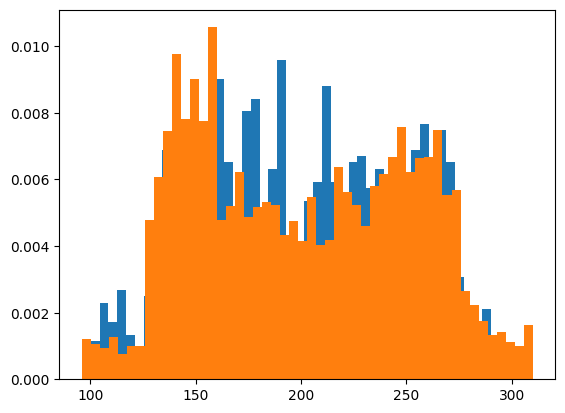

In [68]:
#сформируем датафреймы и отрисуем совмещенные гистограммы распределения
highsalary_pers = hr_df[hr_df['salary'] == 'high']['average_montly_hours']
lowsalary_pers = hr_df[hr_df['salary'] == 'low']['average_montly_hours']

plt.hist(highsalary_pers, bins=50, density=True);
plt.hist(lowsalary_pers, bins=50, density=True);

Вывод: Предварительная графическая оценка позволяет не отклонить H0.

In [78]:
#проведем Т-тест
stat, p = stats.ttest_ind(a = highsalary_pers, b = lowsalary_pers, equal_var = True)
print(f'T-статистика: {stat}, p-value: {p}')
alpha = 0.05
if p < alpha:
  print(f'Так как p-value: {round(p, 2)} меньше уровня значимости: {alpha} - нулевую гипотезу отклоняем.')
  print("Вывод: Время, проведенное на работе сотрудниками зависит от оклада")
else:
  print(f'Так как p-value: {round(p, 2)} больше уровня значимости: {alpha} - нулевую гипотезу не отклоняем.')
  print("Вывод: Время, проведенное на работе сотрудниками не зависит от оклада")

T-статистика: -0.7288680398062308, p-value: 0.4661023478267259
Так как p-value: 0.47 больше уровня значимости: 0.05 - нулевую гипотезу не отклоняем.
Вывод: Время, проведенное на работе сотрудниками не зависит от оклада


Выводы, сделанные в результате статистического и графического анализов совпадают.

**8.  Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности)**:

● Доля сотрудников с повышением за последние 5 лет

● Средняя степень удовлетворенности

● Среднее количество проектов


In [100]:
hr_df_work = hr_df[hr_df['left'] == 0].drop()
hr_df_work.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [131]:
print('Показатели по работающим сорудникам:')
print(f'Всего сотрудников {len(hr_df_work)}')
print(f'Количество сотрудников с повышением {round(len(hr_df_work[hr_df_work["promotion_last_5years"] == 1]), 2)}')
print(f'Доля сотрудников с повышением {round(len(hr_df_work[hr_df_work["promotion_last_5years"] == 1]) / len(hr_df_work), 3)}')
print(f'Средняя степень удовлетворенности {round(hr_df_work["satisfaction_level"].mean(), 2)}')
print(f'Среднее количество проектов {round(hr_df_work["number_project"].mean(), 2)}')

Показатели по работающим сорудникам:
Всего сотрудников 11428
Количество сотрудников с повышением 300
Доля сотрудников с повышением 0.026
Средняя степень удовлетворенности 0.67
Среднее количество проектов 3.79


In [101]:
hr_df_work.shape

(11428, 10)

In [105]:
hr_df_left = hr_df[hr_df['left'] == 1]
hr_df_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [106]:
hr_df_left.shape

(3571, 10)

In [132]:
print('Показатели по уволившимся сорудникам:')
print(f'Всего сотрудников {len(hr_df_left)}')
print(f'Количество сотрудников с повышением {round(len(hr_df_left[hr_df_left["promotion_last_5years"] == 1]), 2)}')
print(f'Доля сотрудников с повышением {round(len(hr_df_left[hr_df_left["promotion_last_5years"] == 1]) / len(hr_df_left), 3)}')
print(f'Средняя степень удовлетворенности {round(hr_df_left["satisfaction_level"].mean(), 2)}')
print(f'Среднее количество проектов {round(hr_df_left["number_project"].mean(), 2)}')

Показатели по уволившимся сорудникам:
Всего сотрудников 3571
Количество сотрудников с повышением 19
Доля сотрудников с повышением 0.005
Средняя степень удовлетворенности 0.44
Среднее количество проектов 3.86


**9. Разделить данные на тестовую и обучающую выборки.
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary).
Оценить качество модели на тестовой выборки**


In [3]:
hr_df_LDA = hr_df.drop(columns = ['department','salary'])
hr_df_LDA.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [53]:
#разделим выборку на тестовую и обучающую и выведем результат на экран
variety = pd.array(hr_df_LDA.left)
X_train, X_test, y_train, y_test = train_test_split(hr_df_LDA, variety, test_size=0.2)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
pd.DataFrame([y_test, lda.predict(X_test)]).T

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
2995,0,0
2996,0,0
2997,1,0
2998,0,1


In [54]:
#Проверим точность предсказаний
accuracy_score(y_test, lda.predict(X_test))

0.7603333333333333

**10. Загрузить jupyter notebook с решение на github и прислать ссылку**